In [ ]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:22pt;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

<b><font size="7" color="red">ch10. N차원배열 다루기</font></b>
-[numpy](http://www.numpy.org)
-[numpy doc](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy패키지를 이용(C언어로 구현된 )

## 1절 넘파이 패키지

In [5]:
import numpy as np
np.__version__

'1.23.5'

In [7]:
#np.arange(from, stop, by) : from부터 stop앞까지 by씩 증가하는 1차원 배열
a = np.arange(15) #0부터 15앞까지 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
## 1.1 배열속성


★★ int는 기본적으로 4bite ★★

In [37]:
from numpy import arange
a arange(15,
         #dtype=np.int16
        ).reshape(3, 5) #3행 5열짜리 2차원 배열로 연산
a

SyntaxError: invalid syntax (623674379.py, line 2)

In [13]:
type(a)

numpy.ndarray

In [16]:
a.dtype # a 배열의 요소들의 type

dtype('int32')

In [17]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [23]:
a.ndim #축수

1

In [24]:
a.size #배열요소의 갯수

15

In [25]:
a.shape#배열구조

(15,)

In [27]:
print('shape 조정전 a\n',a)
a.shape = (5,3)
print('shape 조정후 a\n',a)

shape 조정전 a
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
shape 조정후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [54]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
a.size

12

In [31]:
a.dtype 

dtype('int32')

In [32]:
a.itemsize 

4

In [33]:
a.ndim

2

In [34]:
a.size

12

In [35]:
a.shape

(3, 4)

In [53]:
a.dtype = np.int64 #읽을 때 int64(64bit씩) 읽는다.
a.dtype

dtype('int64')

In [40]:
a.size

6

In [51]:
#배열요소의 타입을 수정
a = a.astype('int64')
#a=a.astype(np.int64)

In [50]:
a.itemsize 

8

In [56]:
a.size

12

In [55]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [58]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [59]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# 1.3 배열저장
- pkl(객체저장,배열,머신러닝) vs  npy(넘파이전용 포맷, io속도 개선)

In [61]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [69]:
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

In [67]:
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)

In [68]:
loaded_a

<function _pickle.load(file, *, fix_imports=True, encoding='ASCII', errors='strict', buffers=())>

In [127]:
%%time 
np.save('data/ch10.npy', a)#저장

CPU times: total: 0 ns
Wall time: 1.11 ms


In [128]:
%%time 
load_np  = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 11 ms


In [129]:
load_np

array([2, 4, 6], dtype=int16)

In [125]:
%%time
for i in range(1000000):
    i**2

CPU times: total: 328 ms
Wall time: 337 ms


# 2절 넘파이 배열
- array() 함수를 이용하여 다른 파이썬 구조(리스트,튜플)를 배열로 변화
- 기타함수들: arange ones, zeros, full, empty....linspace
- 랜덤값을 갖는 함수들 : np.random.~
## 2.1 array()함수로 넘파이 배열 만들기
- array(obj, dtype='int16', copyT/F)

In [140]:
a = np.array([2,4,6],dtype = np.int16)
a

array([2, 4, 6], dtype=int16)

In [142]:
a[0], a[1], a[2]

(2, 4, 6)

In [143]:
for i in a:
    print(i, end='\t')

2	4	6	

In [78]:
a[0], a[1], a[2]

(2, 4, 6)

In [144]:
b = np.array([ [1.5, 2.3],  # 배열은 동일 자료형의 집합 : 정수->실수->문자
               [4,   5]])

In [ ]:
for i in a:
    print(i, end='\t')

In [145]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [136]:
b = b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9.,  0.],
       [11., 12., 13., 14., 15.]], dtype=float32)

In [97]:
print(b.dtype)
print(b.itemsize)

float64
8


In [135]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

int16
2


In [134]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() # 개행

1	2	3	4	5	
6	7	8	9	0	
11	12	13	14	15	


In [133]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i, j, item, b[i,j]), end='\t')
    print() # 개행

0행0열 : 1.0(1.0)	0행1열 : 2.0(2.0)	0행2열 : 3.0(3.0)	0행3열 : 4.0(4.0)	0행4열 : 5.0(5.0)	
1행0열 : 6.0(6.0)	1행1열 : 7.0(7.0)	1행2열 : 8.0(8.0)	1행3열 : 9.0(9.0)	1행4열 : 0.0(0.0)	
2행0열 : 11.0(11.0)	2행1열 : 12.0(12.0)	2행2열 : 13.0(13.0)	2행3열 : 14.0(14.0)	2행4열 : 15.0(15.0)	


In [132]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b


array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [131]:
b[0,1] #없는 인덱싱시 에러 ex. b[3,0]

2

In [130]:
print('0~1행, 1~2열 :\n', b[0:2, 1:3]) 
print('2행모두(1차원) :', b[2, :], b[2])      #특정행, 모든열을 추출할 경우, 열생략 가능
print('2행모두(2차원) :', b[2:3, :], b[2:3])
print('4열모두(1차원) :', b[:,4], b[...,4], b[:, -1]) # 특정열, 모든행을 추출할 경우
print('2행 0~3열 :', b[2, 0:-1])
print('마지막열 제외 :\n', b[:, :-1])

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열모두(1차원) : [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~3열 : [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [150]:
# 스칼라변수
a = [10, 20]
#copy_a = a
copy_a = a.copy()
print(f"a = {a}, 복제본 = {copy_a}")

copy_a[0] = -1
print(f"a = {a}, 복제본 = {copy_a}")

a = [10, 20], 복제본 = [10, 20]
a = [10, 20], 복제본 = [-1, 20]


In [155]:
import numpy as np
c = np.array([[1,2],[3,4]])
#d = c
d = np.array(c, copy=True)
print(f'c = ', c, sep= '\n')
print(f'd = ', d, sep= '\n')
d[0,0] = 9
print(f'c = ', c, sep= '\n')
print(f'd = ', d, sep= '\n')

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
c = 
[[1 2]
 [3 4]]
d = 
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다0
- np.ones(tup) : 요소들이 다1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용이등 임의 값인 배열(매모리 상태에 따라 초기값 달라짐)
※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64.dtype속성을 따로 지정가능

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [157]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [160]:
x = np.zeros((2,5), dtype=np.bool_) 
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


In [164]:
x = np.ones((2, 5), dtype=np.int8)
x

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [73]:
np.full( (2,3), -1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

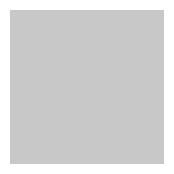

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize=(가로, 세로)
img = np.full( (28,28), 200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축 없애기
plt.show()

In [1]:
import numpy as np
np.empty( (3, 2) ) # 초기값이 메모리 상태에 따라 다름

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

2.3 랜덤값을 갖는 배열 만들기
np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값

np.random.uniform(low=0.0, high=1.0, size=tup) : low부터 high미만의 균등분포를 갖는 랜덤값

np.random.normal(loc=0.0, scale=1.0, size=tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값

np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)

np.random.randn(n) : 표준정규분포(평균0,표준편차1)

cf) np.random.randint([from,] to) : from(0)부터 to미만의 정수 난수 1개발생==random.randint(from, to-1)

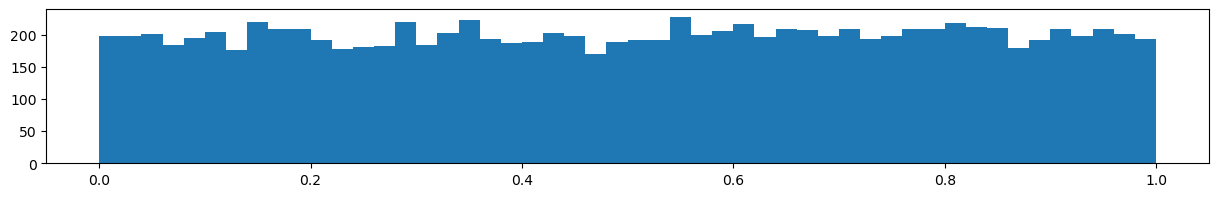

In [61]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프크기
plt.hist(x, bins=50)
plt.show()

In [63]:
# 1차원 난수 배열
print(np.random.rand(3)) # 균등분포
print(np.random.randn(3)) # 정규분포

[0.13532296 0.39414971 0.22777863]
[-0.457113   -0.7935474  -0.17017734]


In [64]:
# 2차원 난수 배열
np.random.random( (2,5) ) # 2행5열짜리 균등분포(0~1미만) 난수 배열

array([[0.47724234, 0.8656212 , 0.13644235, 0.40976099, 0.94225441],
       [0.19897004, 0.9244228 , 0.0415263 , 0.61568774, 0.51819268]])

In [65]:
np.random.uniform(low=-2, high=2, size=(2,5)) #2행5열짜리 균등분포(-2~2미만) 난수 배열

array([[-1.15784652, -0.83077419, -1.94126979,  1.19941855, -1.03189778],
       [ 0.29779887, -0.471674  ,  1.88827918, -1.22361522, -1.7969194 ]])

In [66]:
np.random.normal(size=(2,5)) #2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[-2.30899006, -0.14781034,  0.47677257, -2.02637094, -0.36459985],
       [ 1.33752158, -0.21161556,  0.74870831, -1.43026854, -0.60539042]])

In [24]:
np.random.normal(-1, 1, (2,5)) #2행5열짜리 정규분포(평균-1, 표준편차1) 난수 배열

array([0.34329902, 0.94010525])

2.4 연속된 값을 갖는 1차원 배열 만들기
np.arange(from, to, by, dtype) : from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

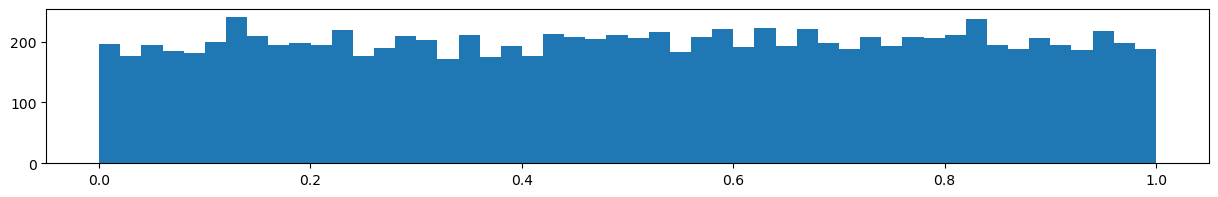

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(10000)
#print(x)
plt.figure(figsize=(15, 2))
plt.hist(x, bins=50)
plt.show()

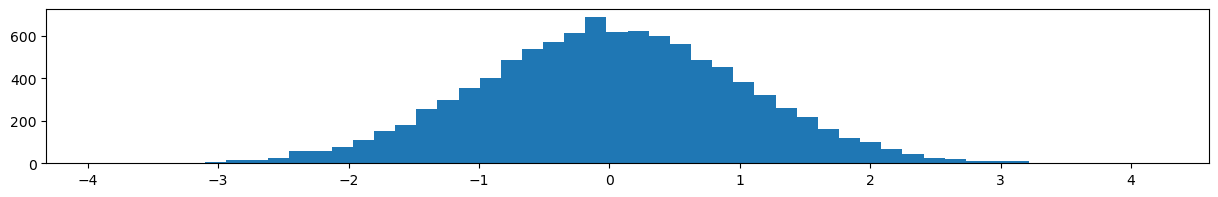

In [46]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10000)
#print(x)
plt.figure(figsize=(15, 2))
plt.hist(x, bins=50)
plt.show()

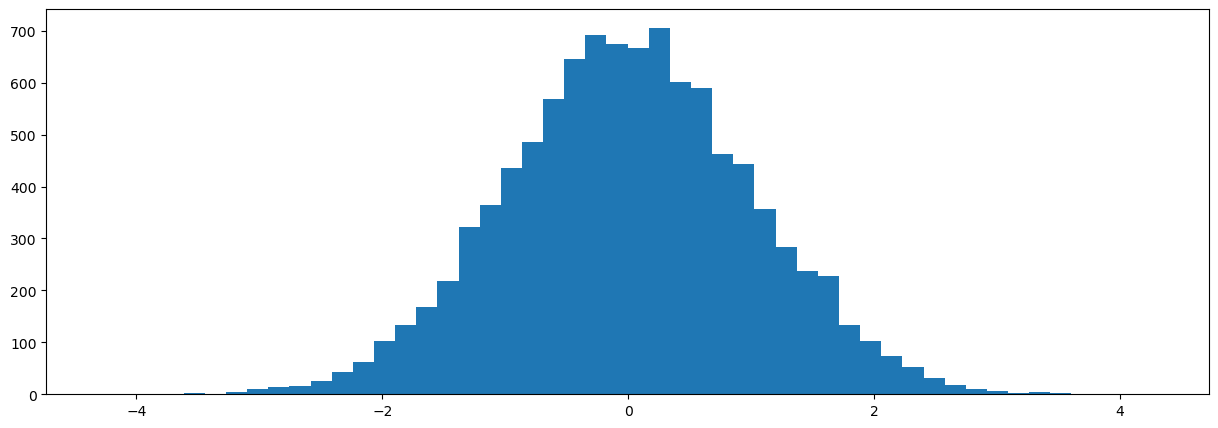

In [51]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(10000) #정규분포(표준정규는 평균0, 표준편차가 )
#print(x)
plt.figure(figsize=(15, 5))
plt.hist(x, bins=50)
plt.show()

In [53]:
print(np.random.rand(3))
print(np.random.randn(3)) #정규분포

[0.34854633 0.52960989 0.86170424]
[-0.7214744   0.27469641  0.73996618]


In [54]:
np.random.random((2,5))

array([[0.73115919, 0.51771874, 0.99064705, 0.13162403, 0.76817524],
       [0.27395296, 0.47979744, 0.80634847, 0.73434637, 0.64951199]])

In [56]:
np.random.uniform(low=-2, high=2, size=2)

array([-0.90872718, -1.33614426])

In [58]:
np.random.uniform(size=(2, 5))

array([[0.32855109, 0.54338558, 0.87941275, 0.73730735, 0.63655183],
       [0.7498858 , 0.36581451, 0.18673673, 0.53027252, 0.55311437]])

In [59]:
np.random.uniform(-1,1, size=(2, 5))

array([[-0.94639558,  0.67769761,  0.13350636, -0.03145897, -0.87475785],
       [-0.2687641 ,  0.68669718,  0.27027544, -0.28967664, -0.67473029]])

In [68]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [69]:
np.arange(0, 2.1, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

In [70]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [71]:
# linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

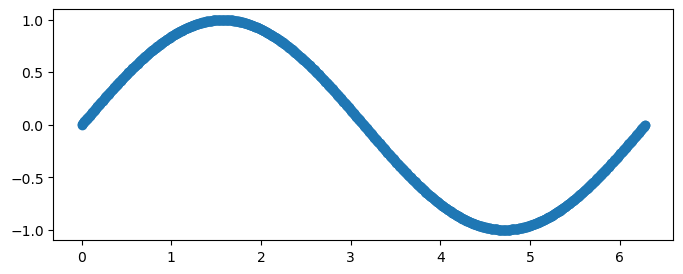

In [72]:
plt.figure(figsize=(8, 3))
plt.scatter(x, y)
plt.show()